# Homework 5
## Linear Regression Error
$\newcommand{\R}{\mathbb{R}}$

Consider a noisy target $y = \mathbf w^{*T}\mathbf x + \epsilon$, where $\mathbf x \in \R^d$ (with the added coordinate $x_0 = 1$), $y \in \R$, $\mathbf w^*$ is an unknown vector, and $\epsilon$ is a noise term with zero mean and $\sigma^2$ variance. Assume $\epsilon$ is independent of $\mathbf x$ and of all other $\epsilon$'s. If linear regression is carried out using a training data set $\mathcal D = {(x_1, y_1); ... , (x_N, y_N)}$, and outputs the
parameter vector $\mathbf w_{lin}$, it can be shown that the expected in-sample error $E_{in}$ with respect to $\mathcal D$ is given by:

$$
\mathbb E_{\mathcal D}[E_{in}(\mathbf w_{lin})]=\sigma^2 \bigg( 1-\frac{d+1}{N} \bigg)
$$

### Question 1
For $\sigma^2=0.1$ and $d = 8$, which among the following choices is the smallest number of examples $N$ that will result in an expected $E_{in}$ greater than 0.008?  

**Answer**: Simplyfying the above equation for the expected in-sample error $E_{in}$ wrt $\mathcal D$ we get
$$
\begin{align}
\sigma^2 \bigg( 1-\frac{d+1}{N} \bigg) > E_{in} \\
N > \frac{d+1}{\bigg( 1-\frac{E_{in}}{\sigma^2} \bigg)}
\end{align}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
%config InlineBackend.figure_format = 'retina'

In [2]:
d = 8
Ein = 0.008
sigma = 0.1
(d+1)/(1-(Ein/sigma**2))

44.99999999999996

Hence, the smallest number of examples that is greater than 45 is 100 i.e. choice (c).

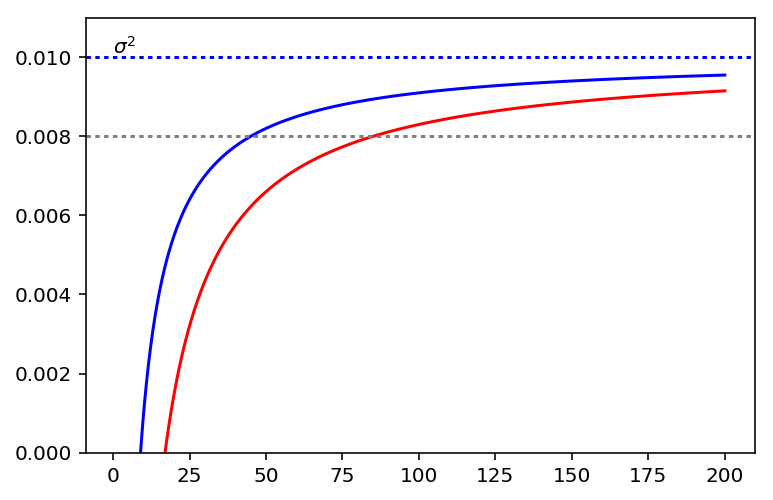

In [3]:
x = np.arange(1,200,.01)
f = sigma**2*(1-(d+1)/x)
f1 = sigma**2*(1-(d+d+1)/x)
plt.plot(x,f, c='blue')
plt.plot(x,f1, c='red')
plt.axhline(y=Ein, c='grey', ls = ':')
plt.axhline(y=sigma**2, c='blue', ls = ':')
plt.text(0,sigma**2+0.0001, '$\sigma^2$')
plt.ylim(0,0.011)
plt.show()

## Nonlinear Transforms
In linear classifcation, consider the feature transform $\Phi : \R^2 \to \R^2$ (plus the added zeroth coordinate) given by:
$$
\Phi(1,x_1, x_2)=(1, x^2_1, x^2_2)
$$
### Question 2
Which of the following sets of constraints on the weights in the $\mathcal Z$ space could correspond to the hyperbolic decision boundary in $\mathcal X$ depicted in the figure?
![title](Hw5_p2_Q.png)  
You may assume that $\tilde{w_0}$ can be selected to achieve the desired boundary?

**Answer**: Let's visualize the problem similary as in lecture. For the value of $\tilde{w_0}$ we will set to +1 in order to get +1 for the points in the center. Note that decreasing the value of $\tilde{w_0}$ contracts the boundary curves. Red points are +1 and purple represent -1. Plotting all combinations we get the following:

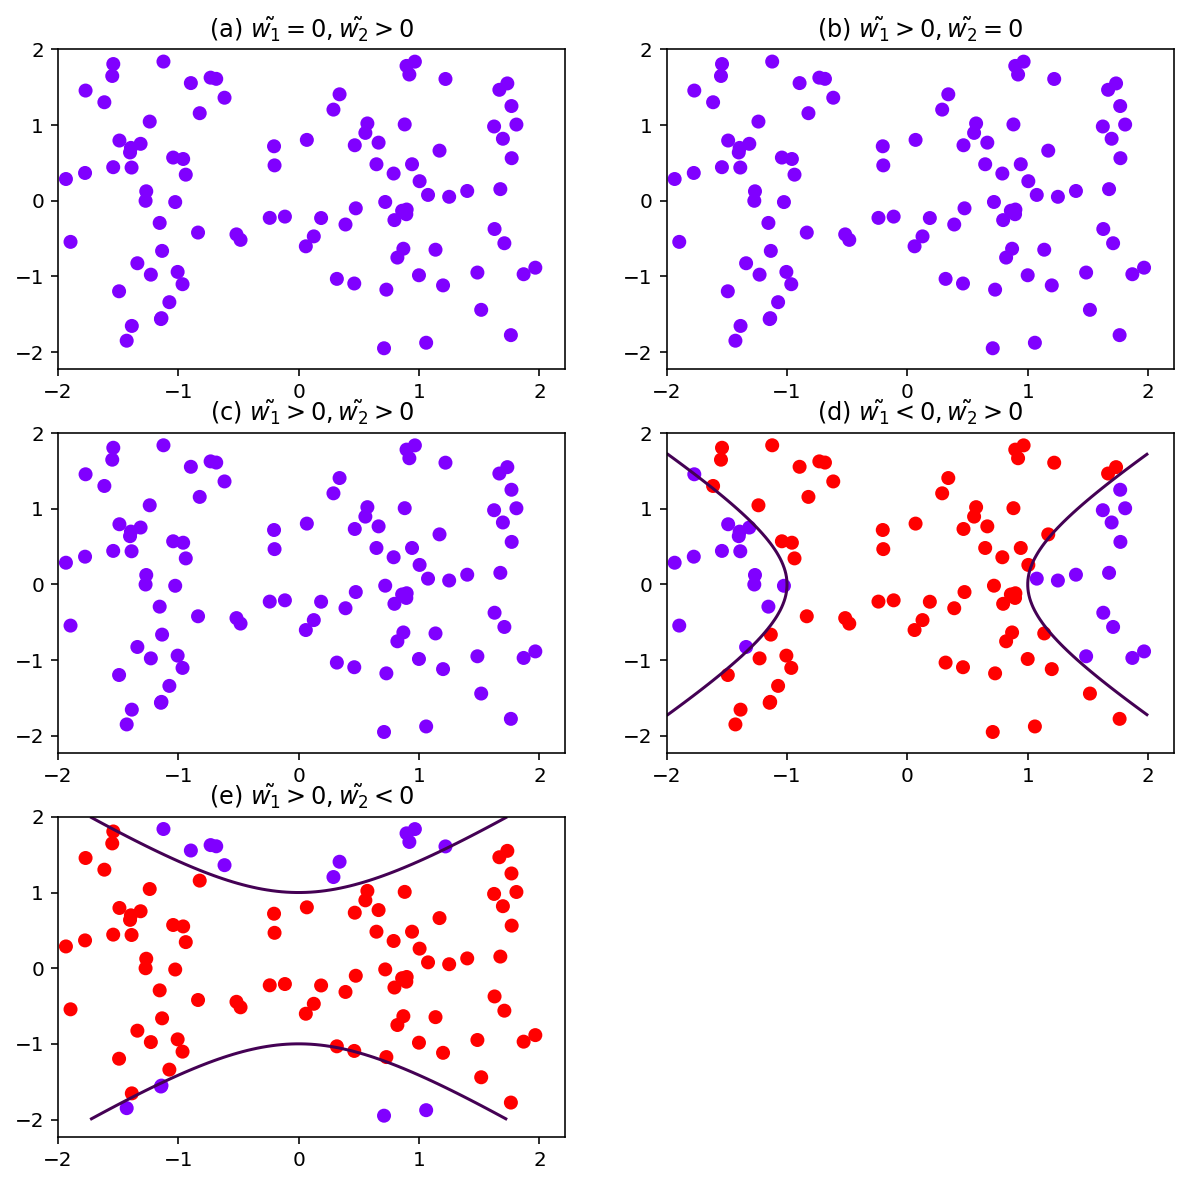

In [4]:
X1 = np.random.uniform(-2.,2., size=(100, 2))
x = np.linspace(-2.0, 2.0, 100)
y = np.linspace(-2.0, 2.0, 100)
X, Y = np.meshgrid(x,y)
plt.figure(figsize=(10, 10))
# (a) w_1=0, w_2>0
plt.subplot(3,2,1)
f1 = Y**2 + 1
plt.contour(X,Y,f1,[0])
Y1 = np.sign(X1[:,1]**2+1)
plt.scatter(X1[:,0],X1[:,1], c=Y1, cmap=('rainbow'))
plt.title(r'(a) $\tilde{w_1}=0, \tilde{w_2}>0$')

# (b) w_1>0, w_2=0
plt.subplot(3,2,2)
f1 = X**2 + 1
plt.contour(X,Y,f1,[0])
Y1 = np.sign(X1[:,0]**2+1)
plt.scatter(X1[:,0],X1[:,1], c=Y1, cmap=('rainbow'))
plt.title(r'(b) $\tilde{w_1}>0, \tilde{w_2}=0$')

# (c) w_1>0, w_2>0
plt.subplot(3,2,3)
f1 = X**2 + Y**2 + 1
plt.contour(X,Y,f1,[0])
Y1 = np.sign(X1[:,0]**2 + X1[:,1]**2 + 1)
plt.scatter(X1[:,0],X1[:,1], c=Y1, cmap=('rainbow'))
plt.title(r'(c) $\tilde{w_1}>0, \tilde{w_2}>0$')

# (d) w_1<0, w_2>0
plt.subplot(3,2,4)
f1 = -X**2 + Y**2 + 1
plt.contour(X,Y,f1,[0])
Y1 = np.sign(-X1[:,0]**2+X1[:,1]**2+1)
plt.scatter(X1[:,0],X1[:,1], c=Y1, cmap=('rainbow'))
plt.title(r'(d) $\tilde{w_1}<0, \tilde{w_2}>0$')

# (e) w_1>0, w_2<0
plt.subplot(3,2,5)
f1 = X**2 - Y**2 + 1
plt.contour(X,Y,f1,[0])
Y1 = np.sign(X1[:,0]**2 - X1[:,1]**2+1)
plt.scatter(X1[:,0],X1[:,1], c=Y1, cmap=('rainbow'))
plt.title(r'(e) $\tilde{w_1}>0, \tilde{w_2}<0$')

plt.show()

From above plots we can see that $\tilde{w_1}<0$ and $\tilde{w_2}>0$ is what we need, so the answer is (d). For the first three plots we don't have appropriate plots as the with the given values of $\tilde{w}$'s we don't get any +1 outcomes. However, when we change the $\tilde{w_0}$ to -1 we do get the boundary but with the oposite sign.

Now, consider the 4th order polynomial transform from the input space $\R^2$:
$$
\Phi_4:\mathbf x \to (1, x_1, x_2, x^2_1, x_1x_2, x^2_2, x^3_1, x^2_1x_2, x_1x^2_2, x^3_2,x^4_1,x^3_1x_2,x^2_1x^2_2,x_1x^3_2,x^4_2)
$$  

### Question 3
What is the smallest value among the following choices that is not smaller than the VC dimension of a linear model in this transformed space?

**Answer**: The VC dimension is equal to 14+1=15, where 14 represents the number of parameters and we also need to account for 1 as it is also a parameter $\tilde{w_0}$. Hence, we choose answer (c).

## Gradient Descent


Consider the nonlinear error surface $E(u,v)=(ue^v-2ve^{-u})^2$. We start at the point $(u,v)=(1,1)$ and minimize this error using gradient descent in the uv space. Use $\eta = 0.1$.
### Question 4
What is the partial derivative $E(u,v)$ wrt to $u$, i.e. $\frac{\partial E}{\partial u}$

**Answer**: Partial derivative is 
$$
\begin{align}
\frac{\partial E}{\partial u} &= 2(ue^v-2ve^{-u})\frac{\partial E}{\partial u}(ue^v-2ve^{-u}) \\
&=2(ue^v-2ve^{-u})(e^v-2v(-1)e^{-u}) \\
&=2(ue^v-2ve^{-u})(e^v+2ve^{-u}) 
\end{align}
$$

Answer is (e).

The partial derivative wrt $v$ is
$$
\begin{align}
\frac{\partial E}{\partial v} &= 2(ue^v-2ve^{-u})\frac{\partial E}{\partial u}(ue^v-2ve^{-u}) \\
&=2(ue^v-2ve^{-u})(ue^v-2e^{-u})
\end{align}
$$

### Question 5
How many iterations (among the given choices) does it take for the error $E(u,v)$ to fall below $10^{-14}$ for the first time? In your programs, make sure to use double precision to get the needed accuracy.

In [5]:
# Inputs
u,v = 1,1
eta = 0.1

# Partial derivatives wrt u and v respecitvely

no_iter = 0
while True:
    pd_u = 2*(u*np.exp(v)-2*v*np.exp(-u))*(np.exp(v)+2*v*np.exp(-u))
    pd_v = 2*(u*np.exp(v)-2*v*np.exp(-u))*(u*np.exp(v)-2*np.exp(-u))
    error = (u*np.exp(v)-2*v*np.exp(-u))**2
    if error < 1e-14:
        break
    u += -eta*pd_u
    v += -eta*pd_v
    no_iter += 1

print('For the error to fall below 1e-14', no_iter,'iterations are needed.')

For the error to fall below 1e-14 10 iterations are needed.


The answer is (d).

### Question 6
After running enough iterations such that the error has just dropped below 1e-14, what are the closest values (in Euclidean distance) among the following choices to the final $(u,v)$ you got in Problem 5?

In [6]:
print('The closest values of u  ', 
      min([1, 0.713, 0.016, -0.083, 0.045], key=lambda x:abs(x-u)),
     ' with u equal to ', u)
print('The closest values of u  ', 
      min([1, 0.045, 0.112, 0.029, 0.024], key=lambda x:abs(x-v)),
     ' with v equal to ', v)

The closest values of u   0.045  with u equal to  0.0447362903978
The closest values of u   0.024  with v equal to  0.0239587140991


The answer is (e).

### Question 7
Now, we will compare the performance of “coordinate descent.” In each iteration, we have two steps along the 2 coordinates. Step 1 is to move only along the $u$ coordinate to reduce the error (assume first-order approximation holds like in gradient descent), and step 2 is to reevaluate and move only along the $v$ coordinate to reduce the error (again, assume first-order approximation holds). Use the same learning rate of $\eta = 0.1$ as we did in gradient descent. What will the error $E(u,v)$ be closest to after 15 full iterations (30 steps)?

In [7]:
# Inputs
eta = 0.1
no_iter = 15
u,v = 1,1

error = []
for i in range(no_iter):
    pd_u = 2*(u*np.exp(v)-2*v*np.exp(-u))*(np.exp(v)+2*v*np.exp(-u))
    u += -eta*pd_u
    error.append((u*np.exp(v)-2*v*np.exp(-u))**2)
    
    pd_v = 2*(u*np.exp(v)-2*v*np.exp(-u))*(u*np.exp(v)-2*np.exp(-u))   
    v += -eta*pd_v
    error.append((u*np.exp(v)-2*v*np.exp(-u))**2)

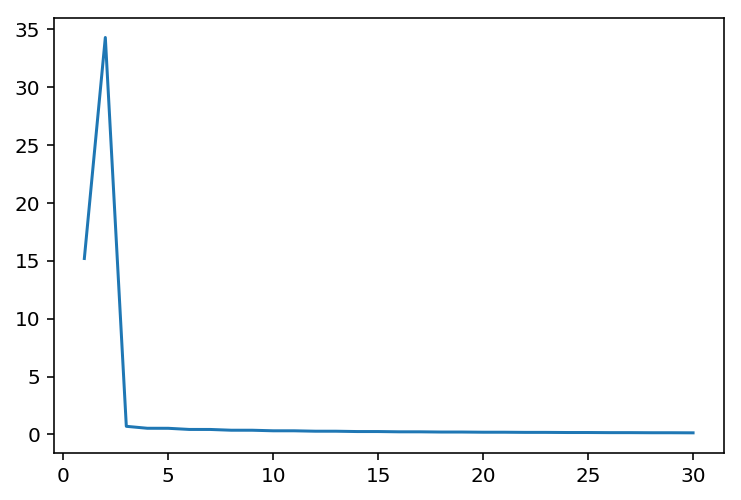

The error of 2-step update after 15 iterations is 0.139813791996
The error is closest to  0.1


In [8]:
plt.plot(np.arange(1,len(error)+1,1),error)
plt.show()
print('The error of 2-step update after 15 iterations is',
      error[len(error)-1])
print('The error is closest to ', 
      min([1e-1, 1e-7, 1e-14, 1e-17, 1e-20], 
          key=lambda x:abs(x-error[len(error)-1])))

The answer is (a).

## Logistic Regression
In this problem you will create your own target function $f$ (probability in this case) and data set $\mathcal D$ to see how Logistic Regression works. For simplicity, we will take $f$ to be a 0/1 probability so $y$ is a deterministic function of $x$.  

Take $d = 2$ so you can visualize the problem, and let $\mathcal X = [-1,1][-1,1]$ with uniform probability of picking each $x \in \mathcal X$ . Choose a line in the plane as the boundary between $f(x) = 1$ (where $y$ has to be +1) and $f(x) = 0$ (where $y$ has to be −1) by taking two random, uniformly distributed points from $\mathcal X$ and taking the line passing through them as the boundary between $y = ±1$. Pick $N = 100$ training points at random from $\mathcal X$, and evaluate the outputs $y_n$ for each of these points $x_n$.  

Run Logistic Regression with Stochastic Gradient Descent to find $g$, and estimate $E_{out}$ (the cross entropy error) by generating a sufficiently large, separate set of points to evaluate the error. Repeat the experiment for 100 runs with different targets and take the average. Initialize the weight vector of Logistic Regression to all zeros in each run. Stop the algorithm when $||\mathbf w^{(t-1)}-\mathbf w^{(t)}|| < 0.01$, where $\mathbf w(t)$ denotes the weight vector at the end of epoch $t$. An epoch is a full pass through the $N$ data points (use a random permutation of $1,2, ... , N$ to present the data points to the algorithm within each epoch, and use different permutations for different epochs). Use a learning rate of 0.01.  

**Answer**: For questions 8 and 9 we will perform the following steps:

1. Define a line that will split the input space into +1 and -1. This will give the $y_n$ values for train and test set.  

2. Define a function to compute data sets X and contruct the target values (y). The function should generate $x_1,x_2$ set of points uniformly s.t. $x \in \mathcal X=[-1,1][-1,1]$. The functions are `target_line()` and `xy_data(d,N,l)`.  

3. Define a function to compute logistic regression using SGD. The weights are being updates for one epoch until all $n$ data points are not iterated. This would complete one epoch and the algorithm continues to run until stopping criteria is met. The stopping criteria should be applied where the final weights and number of epochs should be returned. The function will provide how many runs over the train data set we need in order for the algortihm to converge given the stoping criteria. The function is `log_reg(N, d, Xy, eta, epsilon)`. The learning rate and the stoping level (`epsilon`) is provided in the problem. The weight vector $w$ is to be initalized at zero (for each epoch). Randomness is introduced via shuffling of index values of the train data set for each epoch. For the weight update use the following 
$$
\frac{y_n\mathbf x}{1+e^{y_n\mathbf w^T(t)x_n}}
$$
Note that since we are computing SGD we neglect the sum and averaging. Run updates through the complete X and record the previous and last weight values.

4. Define a function for compute cross entropy error for each data point. The cross entropy error should be computed on the test set where the target values are generated using the line which we defined separately. The function is ceerr(d, Nt, Xyt, w_nt). The weights for the error function is taken from the finalized logistic regression algorithm. Compute $E_{out}$ using the following equation
$$
E_{out} = \frac{1}{N}\sum_{n=1}^{N} {ln(1-e^{-y_nw^Tx_n})}
$$ 

8. Run the experiment 100 times and take and average of the number of epoch and $E_{out}$ values. For each run a new data set should be generated.

In [9]:
def target_line():
    # Generate random values for the line segment
    xa,ya,xb,yb = [random.uniform(-1, 1) for i in range(4)]
    l = np.array([xb*ya-xa*yb, yb-ya, xa-xb])
    l = l.reshape((l.shape[0],1))

    return l  

In [10]:
def xy_data(d,N,l):        
    # Generate X and y values
    X = np.column_stack((np.ones(N),
                         np.random.uniform(-1.,1., size=(N, d))))
    y = np.sign(np.dot(X,l))
    Xy = np.column_stack((X,y))
    return Xy  

In [11]:
# Compute logistic regression with stochastic gradient descent
def log_reg(N, d, Xy, eta, epsilon):
    no_epoch = 0
    w_norm = 1
    
    # Initialize the weight vector to all zeros
    wt = np.zeros((1,d+1))
    w_all = [] # write all weights per epoch
    
    while w_norm > epsilon:
        no_epoch += 1
        
        # get index for random data shuffle
        Nr = np.arange(N)
        np.random.shuffle(Nr)
    
        # make a copy to be able to compute norm later on
        w = np.copy(wt)
    
        for n in Nr:
            # Compute gradient
            y = Xy[n,d+1]
            x = Xy[n,:d+1]
            grad = -np.divide(y*x, 1 + math.exp(y*np.dot(x,w.T)))
        
            # Update weight
            w = w - eta*grad

        wt1 = w
        w_norm = np.linalg.norm(wt - wt1)
        wt = wt1
        
    w_nt = wt # save last weight vector
        
    return no_epoch, w_nt

In [12]:
# Compute cross entropy error on a test sample
def ceerr(d, Nt, Xyt, w_nt):
    E_out_n = 0
    for i in range(Nt):
        yt = Xyt[i,d+1]
        xt = Xyt[i,:d+1]
        gx = np.dot(xt,w_nt.T)
        E_out_n += (np.log(1 + np.exp(-yt*gx)))
    
    Eout_t = E_out_n/Nt
    return Eout_t

In [13]:
# Inputs
N = 100 # number of examples
Nt = 1000 # number of text examples
d = 2 # data dimension
eta = 0.01 # learning rate
epsilon = 0.01 # stoping criteria
no_trials = 100 # no of times to run the experiment

epochs = []
Eout = []
for n in range(no_trials):
    # target line label
    l = target_line()
    # Get train and test data
    Xy = xy_data(d, N, l)  
    Xyt = xy_data(d, Nt, l)
    
    # Run logistic regression
    no_epoch, w_nt = log_reg(N, d, Xy, eta, epsilon)
    epochs.append(no_epoch)
    
    # Compute cross entropy error
    Eout.append(ceerr(d, Nt, Xyt, w_nt))

### Question 8
Which of the following is closest to $E_{out}$ for $N = 100$?

In [14]:
print('For N = 100, E_out on average, equals ' , np.mean(Eout))

For N = 100, E_out on average, equals  0.101762333191


Answer is (d).

### Question 9
How many epochs does it take on average for Logistic Regression to converge for $N = 100$ using the above initialization and termination rules and the specified learning rate? Pick the value that is closest to your results.

In [15]:
print('Average number of epoch it takes to converge for N = 100 is ', 
      np.mean(epochs))

Average number of epoch it takes to converge for N = 100 is  342.67


Answer is (a).